In [1]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import style

sample rate= 2KHZ

In [2]:
t=np.linspace(0,1.0,2001)

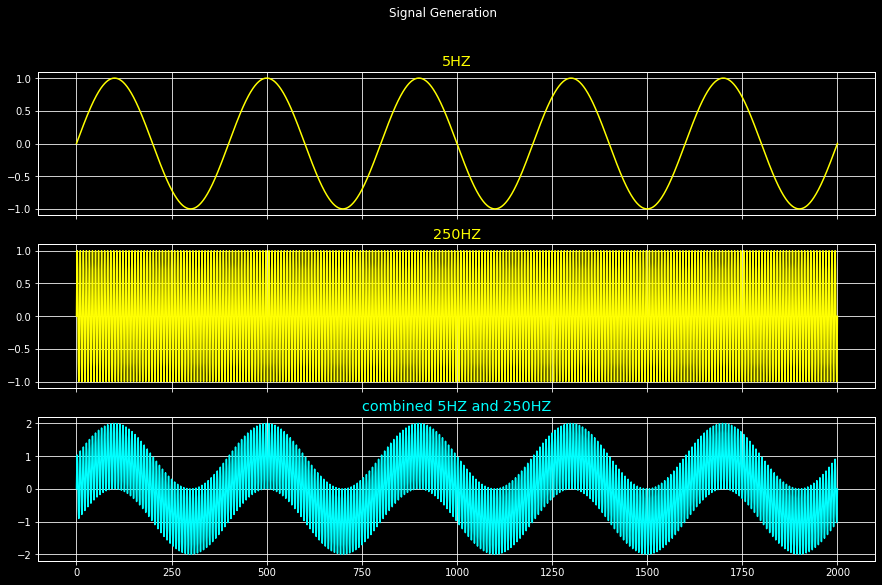

In [3]:
sig_5HZ=np.sin(2*np.pi*5*t)
sig_250HZ=np.sin(2*np.pi*250*t)
sig_5HZ_250HZ=sig_5HZ+sig_250HZ
style.use('ggplot')
style.use('dark_background')


f,plt_arr=plt.subplots(3,sharex=True,figsize=(15,9))
f.suptitle('Signal Generation')

plt_arr[0].plot(sig_5HZ,color='yellow')
plt_arr[0].set_title('5HZ',color='yellow')
plt_arr[1].plot(sig_250HZ,color='yellow')
plt_arr[1].set_title('250HZ',color='yellow')
plt_arr[2].plot(sig_5HZ_250HZ,color='cyan')
plt_arr[2].set_title('combined 5HZ and 250HZ',color='cyan')
plt.show()

signal statics

In [4]:
print('the signal mean is',np.mean(sig_5HZ_250HZ),', its variance is ',np.var(sig_5HZ_250HZ), ',its standered deviation is',np.std(sig_5HZ_250HZ),', and its signal to noise ratio is',100*np.mean(sig_5HZ_250HZ)/np.std(sig_5HZ_250HZ))

the signal mean is -3.692975738083479e-16 , its variance is  0.9995002498750623 ,its standered deviation is 0.9997500937109545 , and its signal to noise ratio is -3.693898866641351e-14


running sum of the signal

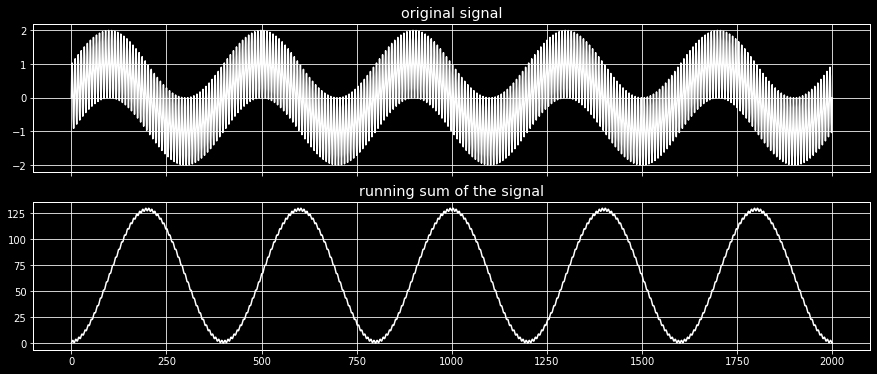

In [5]:
f,plt_arr=plt.subplots(2,sharex=True,figsize=(15,6))
running_sum_of_the_signal=np.cumsum(sig_5HZ_250HZ)
plt_arr[0].plot(sig_5HZ_250HZ,color='white')
plt_arr[0].set_title('original signal',color='white')
plt_arr[1].plot(running_sum_of_the_signal,color='white')
plt_arr[1].set_title('running sum of the signal',color='white')
plt.show()

First difference of a signal 

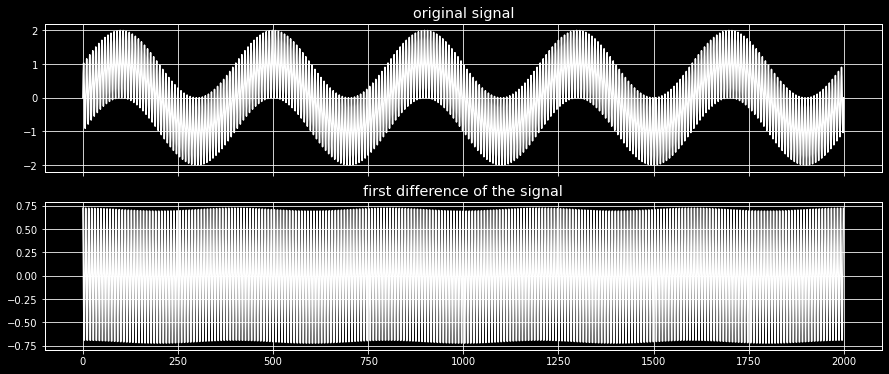

In [6]:
f,plt_arr=plt.subplots(2,sharex=True,figsize=(15,6))
first_difference_of_the_signal=np.diff(sig_5HZ_250HZ)
plt_arr[0].plot(sig_5HZ_250HZ,color='white')
plt_arr[0].set_title('original signal',color='white')
plt_arr[1].plot(first_difference_of_the_signal,color='white')
plt_arr[1].set_title('first difference of the signal',color='white')
plt.show()

Fast Fourier Transform (FFT): it is used to convert a signal from time domain to frequency domain

C:\Users\sony\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


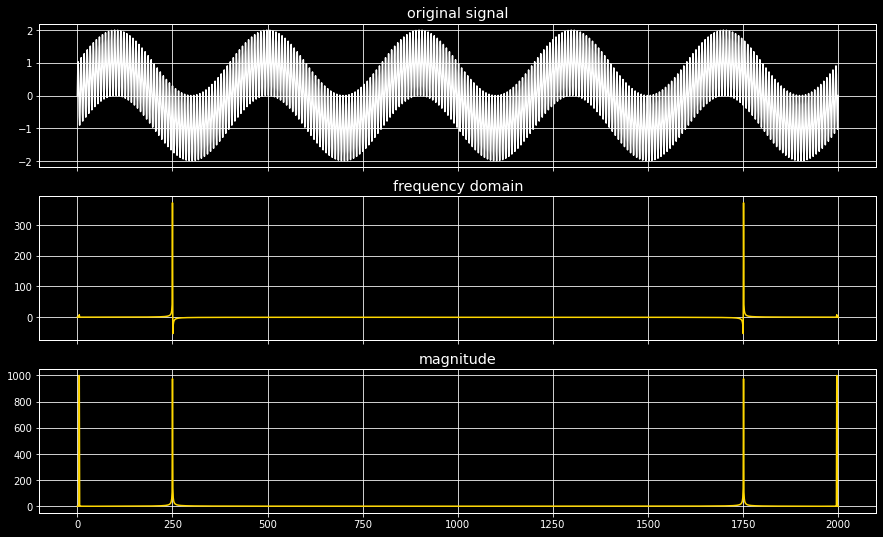

In [7]:
from scipy.fftpack import fft, ifft
freq_domain=fft(sig_5HZ_250HZ)
magnitude=np.abs(freq_domain)
f,plt_arr=plt.subplots(3,sharex=True,figsize=(15,9))
plt_arr[0].plot(sig_5HZ_250HZ,color='white')
plt_arr[0].set_title('original signal',color='white')
plt_arr[1].plot(freq_domain,color='gold')
plt_arr[1].set_title('frequency domain',color='white')
plt_arr[2].plot(magnitude,color='gold')
plt_arr[2].set_title('magnitude',color='white')
plt.show()

the shape of the frequency domain is as expected since each periodic signal in time domain will result as a point in frequency domain and vice versa. below I will plot the inverse of fast fourier transform(IFFT)

C:\Users\sony\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


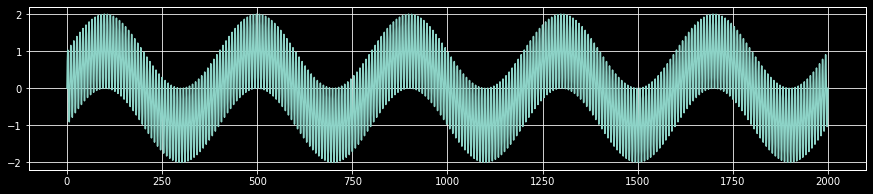

In [8]:
plt.subplots(1,figsize=(15,3))
plt.plot(ifft(freq_domain))
plt.show()

another library to find FFT is numpy so I will repeat the previous step using numpy with more details

C:\Users\sony\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


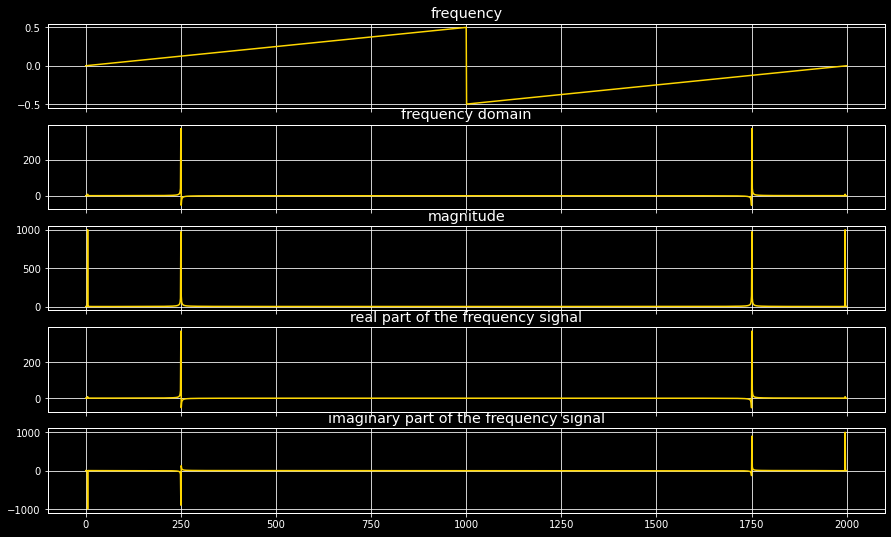

In [9]:
freq_domain=np.fft.fft(sig_5HZ_250HZ)
magnitude=np.abs(freq_domain)
freq = np.fft.fftfreq(t.shape[-1])
f,plt_arr=plt.subplots(5,sharex=True,figsize=(15,9))
plt_arr[0].plot(freq,color='gold')
plt_arr[0].set_title('frequency',color='white')
plt_arr[1].plot(freq_domain,color='gold')
plt_arr[1].set_title('frequency domain',color='white')
plt_arr[2].plot(magnitude,color='gold')
plt_arr[2].set_title('magnitude',color='white')
plt_arr[3].plot(freq_domain.real,color='gold')
plt_arr[3].set_title('real part of the frequency signal',color='white')
plt_arr[4].plot(freq_domain.imag,color='gold')
plt_arr[4].set_title('imaginary part of the frequency signal',color='white')

plt.show()

it is noticable that the real part part is simetric since it is represented by cosine function and the negative sign does not effect it while in the imaginary part it is represented by sine wave so at the negative side will be negative the positive

designing median filter to smooth the signal

Text(0.5, 1.0, 'output signal')

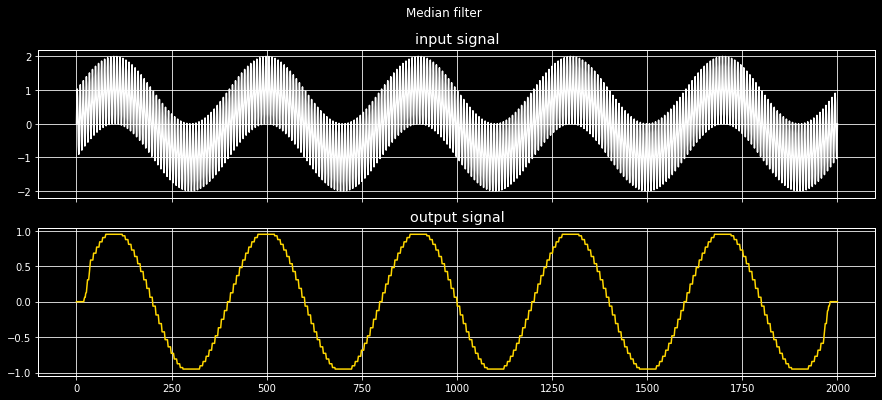

In [10]:
f,plt_arr=plt.subplots(2,sharex=True,figsize=(15,6))
f.suptitle('Median filter')
plt_arr[0].plot(sig_5HZ_250HZ,color='white')
plt_arr[0].set_title('input signal',color='white')
plt_arr[1].plot(signal.medfilt(sig_5HZ_250HZ,79),color='gold')
plt_arr[1].set_title('output signal',color='white')

Designing fininte impulse response (FIR) filters, below I will take the sampling rate to be 2000HZ meaning the nyquest frequency rate=1000 since fn=2fs

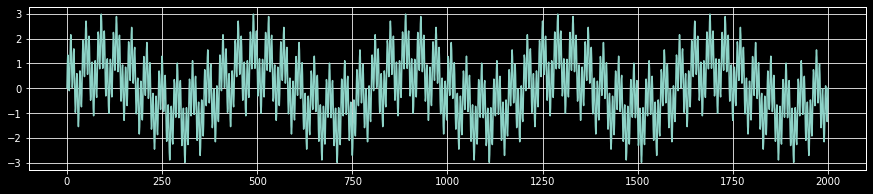

In [11]:
nyq=1000

#creating 50 Hz signal and combine all the signals in one
sig_50HZ=np.sin(2*np.pi*50*t)
sig_5HZ_50HZ_250HZ=sig_50HZ+sig_5HZ_250HZ
plt.subplots(1,figsize=(15,3))
plt.plot(sig_5HZ_50HZ_250HZ)
plt.show()

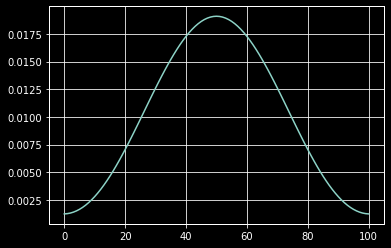

In [12]:
# number of taps
taps=101
#low pass filter cutoff frequency= 7HZ
lpf_cutoff=7
#high pass filter cutoff frequency= 100 HZ
hpf_cutoff=100
#band pass filter required two cutoff frequencies chossen to be 100 and 40
bpf_f1=30
bpf_f2=70

# creating a low pass filter
lpf=signal.firwin(taps,lpf_cutoff,nyq=nyq)

plt.plot(lpf)
plt.show()

if we let the combine signal throw the filter we will get the 5HZ signal only as the output

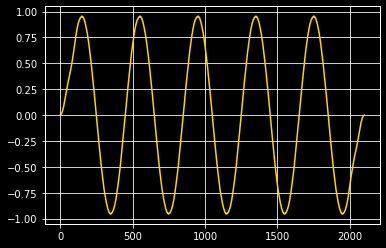

In [13]:

plt.plot(np.convolve(lpf,sig_5HZ_50HZ_250HZ),color='gold')
plt.show()

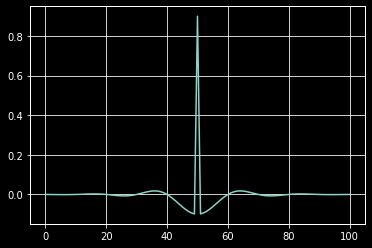

In [14]:
#creating a high pass filter
hpf=signal.firwin(taps,hpf_cutoff,pass_zero=False,nyq=nyq)
plt.plot(hpf)
plt.show()

passing the signal throw the high pass filter we will get the 250HZ signal and this time I will use the signal moudle instead of numpy

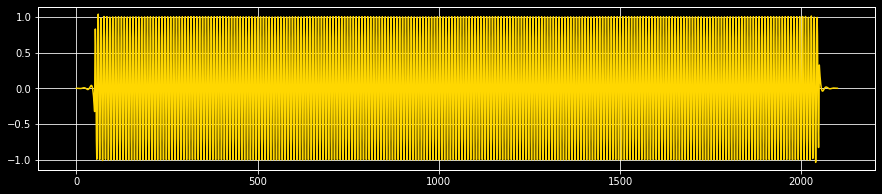

In [15]:
plt.subplots(figsize=(15,3))
plt.plot(signal.convolve(hpf,sig_5HZ_50HZ_250HZ),color='gold')
plt.show()

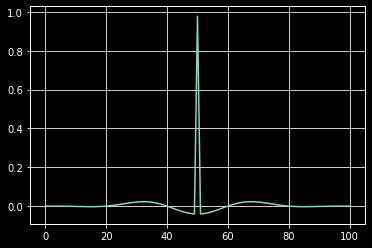

In [16]:
#creating a bandpass filter
bpf=signal.firwin(taps,[bpf_f1,bpf_f2],nyq=nyq)
plt.plot(bpf)
plt.show()

passing the combine signal throw the band pass filter will result in only the 50Hz signal since the limit of the band pass filter is 40 and 100 Hz

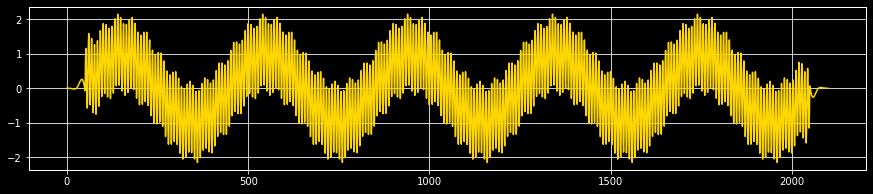

In [17]:
plt.figure(figsize=(15,3))
plt.plot(np.convolve(bpf,sig_5HZ_50HZ_250HZ),color='gold')
plt.show()

Designing infininte impulse response (IIR) filters

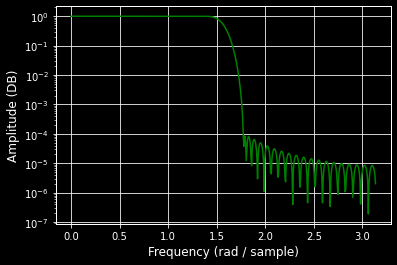

In [18]:
# ploting frequency response of a digital filter

w,h=signal.freqz(signal.firwin(80,0.5,window=('kaiser',8)))
plt.semilogy(w,np.abs(h),'g')
plt.ylabel('Amplitude (DB)',color='w')
plt.xlabel('Frequency (rad / sample)',color='w')
plt.show()

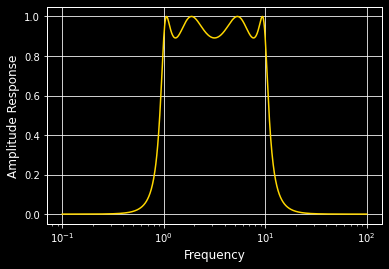

In [19]:
# plotting frequency response of an analog Type I Chebyshev bandpass filter
b,a=signal.iirfilter(4,[1,10],1,60,analog=True,ftype='cheby1')
w,h=signal.freqs(b,a,worN=np.logspace(-1,2,1000))

plt.semilogx(w,abs(h),'gold')
plt.xlabel('Frequency')
plt.ylabel('Amplitude Response')
plt.show()

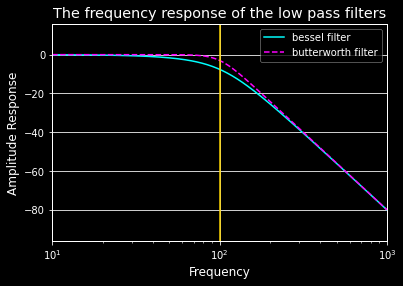

In [20]:
#plotting the frequency response of a Butterworth and Bessel lowpass filters
#bassel filter
b,a=signal.bessel(4,100,'low',analog=True)
w,h=signal.freqs(b,a)
plt.plot(w,20*np.log10(abs(h)),color='cyan',label='bessel filter')
#butterworth filter
b,a=signal.butter(4,100,'low',analog=True)
w,h=signal.freqs(b,a)
plt.plot(w,20*np.log10(abs(h)),color='magenta',ls='dashed',label='butterworth filter')

plt.xscale('log')
plt.margins(0,0.2)
plt.axvline(100,color='gold')

plt.xlabel('Frequency')
plt.ylabel('Amplitude Response')
plt.title('The frequency response of the low pass filters')
plt.legend()
plt.show()

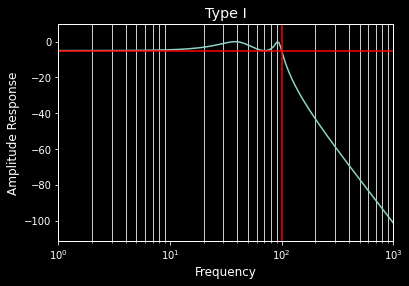

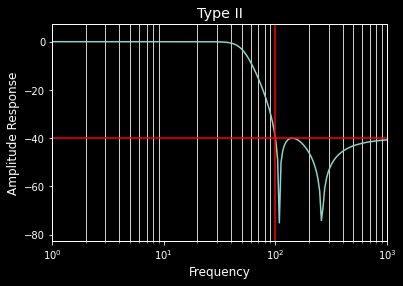

In [21]:
#plotting Type I and II chebyshev lowpass filters
#type I
b,a=signal.cheby1(4,5,100,'low',analog=True)
w,h=signal.freqs(b,a)
# type II
B,A=signal.cheby2(4,40,100,'low',analog=True)
W,H=signal.freqs(B,A)

plt.plot(w,20*np.log10(abs(h)))
plt.xscale('log')
plt.margins(0,0.1)
plt.grid(which='both',axis='both')
plt.axvline(100,color='r')
plt.axhline(-5,color='r')
plt.xlabel('Frequency')
plt.ylabel('Amplitude Response')
plt.title('Type I')
plt.show()

plt.plot(W,20*np.log10(abs(H)))
plt.xscale('log')
plt.margins(0,0.1)
plt.grid(which='both',axis='both')
plt.axvline(100,color='r')
plt.axhline(-40,color='r')
plt.xlabel('Frequency')
plt.ylabel('Amplitude Response')
plt.title('Type II')

plt.show()

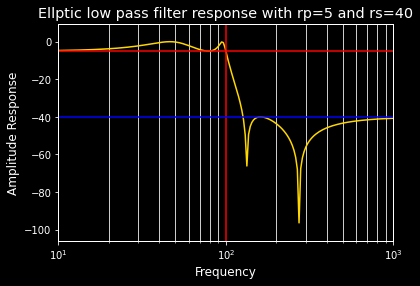

In [22]:
#plotting an elliptic lowpass filter

b,a=signal.ellip(4,5,40,100,'low',analog=True)
w,h=signal.freqs(b,a)


plt.plot(w,20*np.log10(abs(h)),color='gold')
plt.xscale('log')
plt.margins(0,0.1)
plt.grid(which='both',axis='both')
plt.axvline(100,color='r')
plt.axhline(-5,color='r')
plt.axhline(-40,color='b')
plt.xlabel('Frequency')
plt.ylabel('Amplitude Response')
plt.title('Ellptic low pass filter response with rp=5 and rs=40')
plt.show()


Using butterworth bnadpass filter to extrect the 50Hz signal from the combined signal

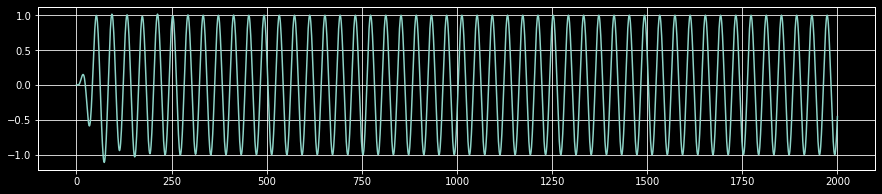

In [23]:
b,a=signal.butter(6,[20/nyq,100/nyq],btype='band')
y=signal.lfilter(b,a,sig_5HZ_50HZ_250HZ)
plt.figure(figsize=(15, 3))
plt.plot(y)